# Boston Housing
---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
# from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
# from tensorflow.keras import metrics

%matplotlib inline
plt.style.use('seaborn')
rcParams['figure.figsize'] = (14,7)

In [41]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

There are 506 total samples, 404 in the training set and 102 in the test set, which is about an 80/20 split.

The 13 features correspond to:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population

With the single target variable being:
1. MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_train = pd.DataFrame(train_data, columns = features)
boston_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [7]:
boston_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 41.2 KB


Notice that the CHAS feature should be categorical.

In [8]:
boston_train['CHAS'] = boston_train['CHAS'].astype('category')
boston_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null category
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: category(1), float64(12)
memory usage: 38.5 KB


In [9]:
boston_train.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


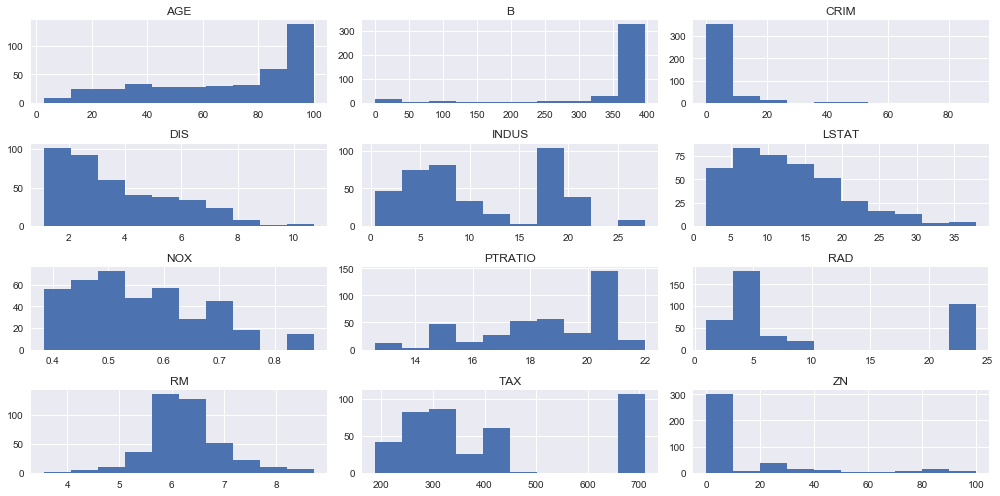

In [10]:
boston_train.hist()
plt.tight_layout();

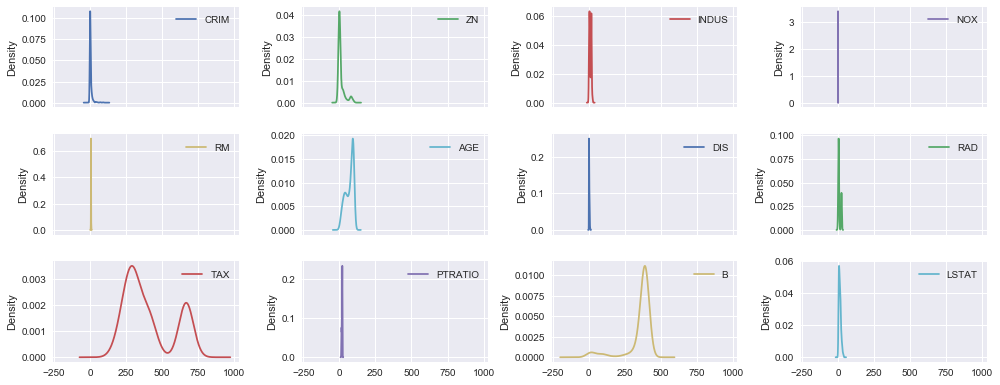

In [11]:
boston_train.plot(kind = 'density', subplots = True, layout = (4,4))
plt.tight_layout();

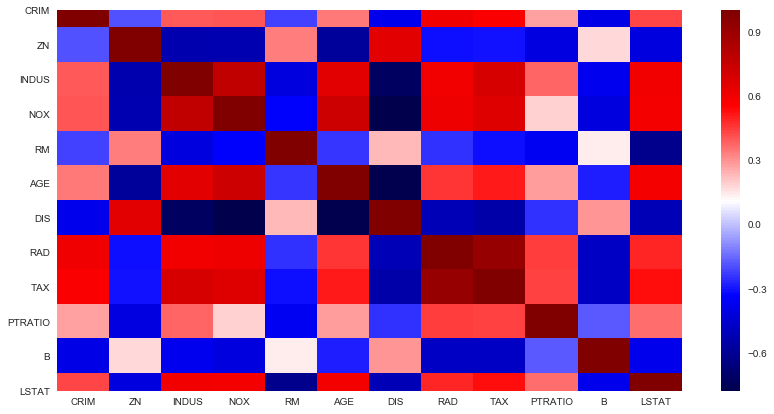

In [12]:
sns.heatmap(boston_train.corr(), cmap = 'seismic')

In [13]:
# I'll center the data now since the features are on different scales and in different units.

mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data = (train_data - mean) / std

test_data = (test_data - mean) / std

You may have just noticed that I normalized the categorical variable 'CHAS'. Debate is still open, but it scales the categorical variable with the other features, and it shouldn't affect the categories importance if it is scaled.

## Baseline model - Linear Regression
Creating a simple model first, and then seeing how much we can improve it or how it compares with other advanced models.

In [42]:
lm = LinearRegression()
lm.fit(train_data, train_targets)
predictions = lm.predict(test_data)

In [218]:
def plot_predictions(X_test, preds):
    data = pd.DataFrame([X_test, preds]).T
    data.columns = ['Actual', 'Predicted']
    data.sort_values(by = 'Actual', inplace = True)
    plt.fill_between(test['Actual'], test['Actual'] - 2*test['Predicted'].std(), test['Actual'] + 2*test['Predicted'].std(),
                     interpolate = True, alpha = 0.13)
    plt.errorbar(test_targets, test_targets, yerr = preds - X_test, alpha = 0.39)
    plt.scatter(data['Actual'], data['Predicted'], lw = 1.5, color = 'red')
    plt.xlabel('Actual', fontsize = 14)
    plt.ylabel('Predicted', fontsize = 14)
    plt.title('Actual vs Predicted', fontsize = 18)

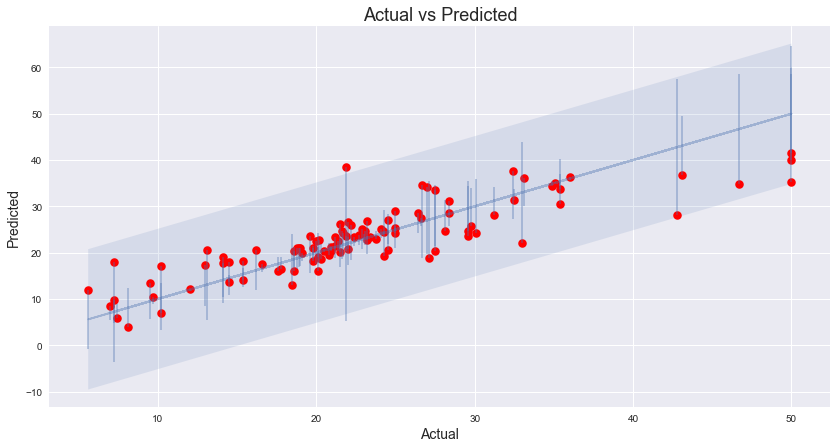

In [219]:
plot_predictions(test_targets, predictions)

In [16]:
print('MAE:', metrics.mean_absolute_error(test_targets, predictions))
print('MSE:', metrics.mean_squared_error(test_targets, predictions))

MAE: 3.4641858124067166
MSE: 23.195599256422977


---

## Now let's see if we can improve using other Machine Learning Algorithms

In [112]:
models = []
models.append(('Lasso', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('Tree', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ADA', AdaBoostRegressor()))

In [113]:
scorer = make_scorer(metrics.mean_absolute_error)

In [114]:
labels = ['Lasso', 'EN', 'Tree', 'KNN', 'SVR', 'RFR', 'GBR', 'ADA']

cv_results = pd.DataFrame(data = 0.0, columns = ['Fold ' + str(i) for i in range(1,8)], index = labels)

for name, model in models:
    kfold = KFold(n_splits = 7, shuffle = True)
    cv_results.loc[name,:] = cross_val_score(model, train_data, train_targets, cv = kfold, scoring = scorer)

cv_results

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7
Lasso,4.212500,3.751997,3.629021,3.617348,3.778959,3.956991,3.880611
EN,4.241616,4.028566,3.411907,4.019146,4.551054,3.340151,3.365231
Tree,3.236207,3.801724,2.174138,2.679310,3.036207,3.038596,2.450877
KNN,5.381379,4.736897,3.941379,3.660690,3.821034,4.729123,4.303860
SVR,5.541073,6.866504,4.271381,5.329675,5.150736,4.418172,5.125389
RFR,2.078552,2.277138,2.512414,2.195897,1.889948,2.932579,1.695456
GBR,2.495410,1.659208,2.305143,2.158940,1.999960,2.500943,2.147385
ADA,2.737844,2.473493,2.656556,2.629218,2.604133,3.392769,2.760020


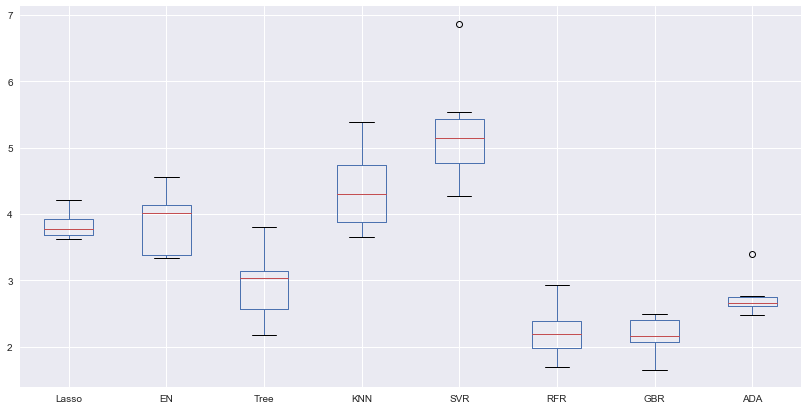

In [115]:
cv_results.T.boxplot()

In [136]:
results = pd.DataFrame(data = 0.0, columns = ['MAE', 'MSE'], index = labels)
# fig, ax = plt.subplots(4,2)
for i, (name, model) in enumerate(models):
    model.fit(train_data, train_targets)
    predicts = model.predict(test_data)
    results.loc[name, 'MAE'] = metrics.mean_absolute_error(test_targets, predicts)
    results.loc[name, 'MSE'] = metrics.mean_squared_error(test_targets, predicts)
#     plot_predictions(test_targets, predicts)
results

,MAE,MSE
Lasso,3.405307,25.821651
EN,3.395978,25.286946
Tree,3.897059,43.965000
KNN,4.376275,36.969314
SVR,5.802698,66.346504
RFR,2.438275,13.932401
GBR,2.335899,12.902590
ADA,3.274394,21.033402


In [117]:
comparison = pd.DataFrame([cv_results.T.mean(), results['MAE']]).T
comparison.columns = ['CV Results', 'Test Results']
comparison['Abs. Diff'] = (comparison['CV Results'] - comparison['Test Results']).abs()
comparison

,CV Results,Test Results,Abs. Diff
Lasso,3.832489,3.405307,0.427182
EN,3.851096,3.395978,0.455118
Tree,2.916723,3.723529,0.806807
KNN,4.367766,4.376275,0.008509
SVR,5.243276,5.802698,0.559422
RFR,2.225998,2.412931,0.186934
GBR,2.180998,2.325845,0.144846
ADA,2.750576,3.214771,0.464195


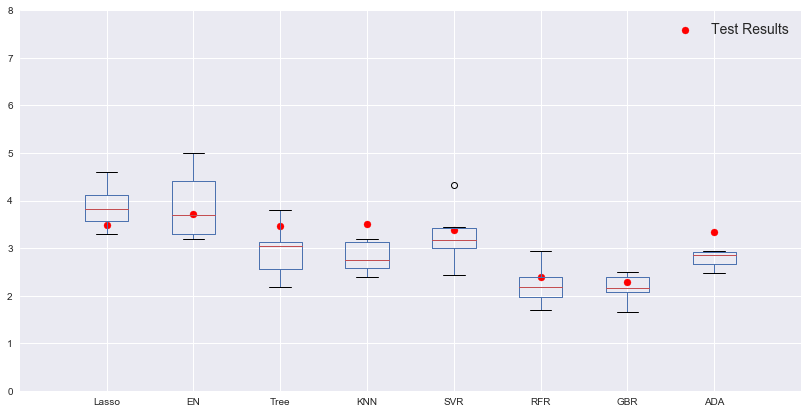

In [24]:
cv_results.T.boxplot()
plt.scatter(x = range(1,9), y = results['MAE'].values, color = 'red', label = 'Test Results')
plt.xticks(ticks = range(1,9), labels = labels)
plt.legend(fontsize = 14)
plt.xlim(0, 9)
plt.ylim(0, 8);

## Now let's see if a DNN can outperform these classical machine learning models